In [79]:
import cellpose
import geopandas as gpd
import numpy as np
import pandas as pd
import scipy
import shapely
import skimage as ski
import tifffile


from cellpose import core, utils, io, models, metrics, plot
from collections import Counter
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
from tqdm import tqdm

from cellpose import models, io

# Allow cellpose to print stdout progress
io.logger_setup()

# Parameter to use single-image mode.image_name
#channels = np.array([[0,0]])
channels = [[2,3], [0,0], [0,0]]
#channels = [[0,0]]

2025-03-28 17:08:36,497 [INFO] WRITING LOG OUTPUT TO /Users/irenegao/.cellpose/run.log
2025-03-28 17:08:36,498 [INFO] 
cellpose version: 	3.1.1.1 
platform:       	darwin 
python version: 	3.12.7 
torch version:  	2.2.2


In [45]:
#dirr = "/Users/irenegao/Downloads/RFP_62.tif"
dirr = "/Users/irenegao/Downloads/tcell_T010.tif"

In [47]:
# Input directory - ddir specifies the top data directory, fasmavim specifies the alphaSMA/Vimentin morphology image file, a1url specifies the lymph node directory path. Example paths shown below.
#dirr = '/home/irene/Documents/RFP_62.tif'

# Levels: pixelsize in µm https://kb.10xgenomics.com/hc/en-us/articles/11636252598925
scalefactors = {
    0: 0.2125,
    1: 0.4250,
    2: 0.85,
    3: 1.7,
    4: 3.4,
    5: 6.8,
    6: 13.6,
    7: 27.2,
}


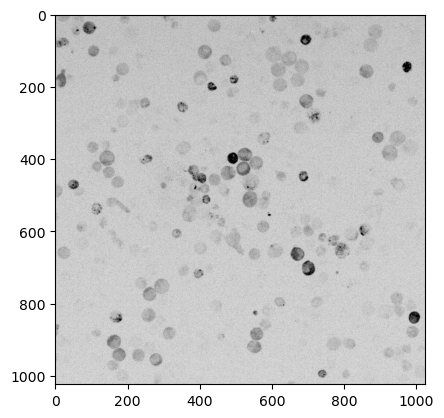

In [49]:
level = 0
#pixelsize = scalefactors[level]
a = tifffile.imread(dirr, is_ome=False, level=level)
plt.imshow(a, cmap='binary')
plt.axis('scaled')
plt.show()
#replace tiffreader and a with forloop that goes through the z slices numpy aray in 3D

In [51]:

# Use cyto3 cellpose modelimage_name
model = models.Cellpose(gpu=False, model_type='cyto3')


2025-03-28 16:56:31,662 [INFO] >>>> using CPU
2025-03-28 16:56:31,664 [INFO] >>>> using CPU
2025-03-28 16:56:31,665 [INFO] >> cyto3 << model set to be used
2025-03-28 16:56:31,781 [INFO] >>>> loading model /Users/irenegao/.cellpose/models/cyto3
2025-03-28 16:56:31,941 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


In [53]:
imgs = a
files = "output"
masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)
#io.masks_flows_to_seg(imgs, masks, flows, diams, files, channels)
#io.save_to_png(imgs, masks, flows, files)

2025-03-28 16:56:34,691 [INFO] channels set to [[0, 0]]
2025-03-28 16:56:34,693 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2025-03-28 16:56:48,117 [INFO] estimated cell diameter(s) in 13.42 sec
2025-03-28 16:56:48,119 [INFO] >>> diameter(s) = 
2025-03-28 16:56:48,120 [INFO] [ 33.06 ]
2025-03-28 16:56:48,120 [INFO] ~~~ FINDING MASKS ~~~
2025-03-28 16:56:56,095 [INFO] >>>> TOTAL TIME 21.40 sec


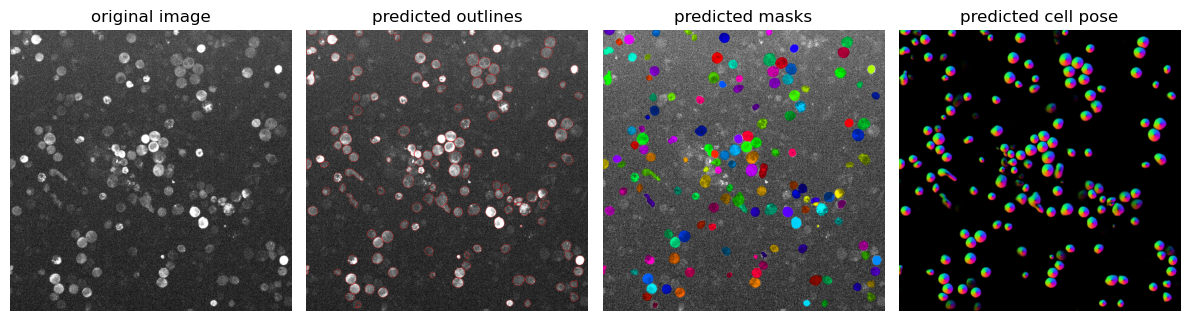

In [55]:
from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, imgs, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

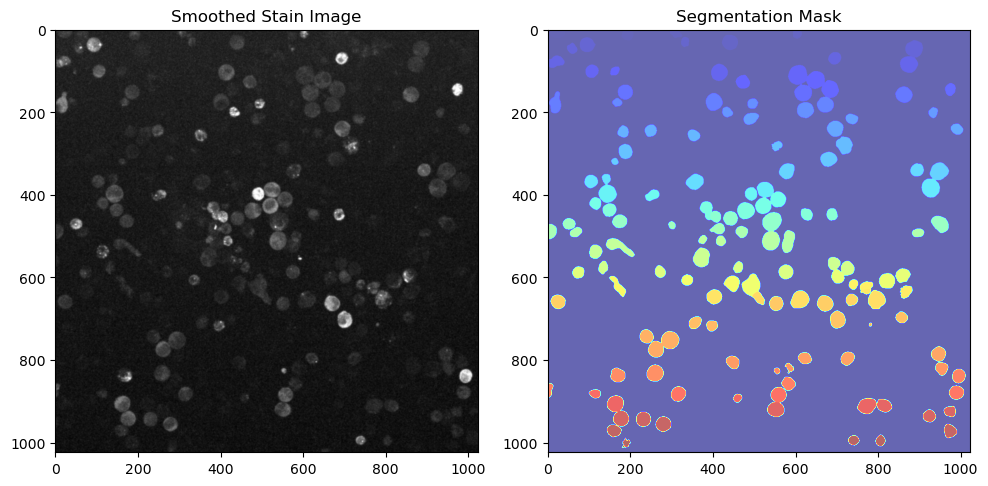

In [57]:
from scipy.ndimage import gaussian_filter

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the stained image with smoothing
smoothed_image = gaussian_filter(a, sigma=1)
ax[0].imshow(smoothed_image, cmap='gray')
ax[0].set_title('Smoothed Stain Image')

# Plot the segmentation mask
ax[1].imshow(masks, cmap='jet', alpha=0.6)
ax[1].set_title('Segmentation Mask')

plt.tight_layout()
plt.show()

In [83]:
results = {10: {1.0: (masks, flows, styles, diams)}}  # Example structure for results
dmasks = {1.0: masks}  # Example ground truth masks
numtruthmasks = len(Counter(dmasks[1.0].flatten())) - 1  # Number of truth masks
subset = a  # Example subset image

for diameter, result in results.items():
    for factor, r in result.items():
        masks, flows, styles, diams = r
        truthmask = dmasks[factor]
        
        # Ensure masks and truthmask are binary for comparison
        masks_binary = masks > 0
        truthmask_binary = truthmask > 0
        intersection_mask = np.logical_and(masks_binary, truthmask_binary)

        # Fraction overlap
        score = round(np.sum(intersection_mask) / np.sum(truthmask_binary), 3) if np.sum(truthmask_binary) > 0 else 0
        # Number of polygons
        nummasks = len(Counter(masks.flatten())) - 1
        print(f'factor={factor} µm-diameter={diameter} score={score} num={nummasks}')

        # Configure cutoffs and plot those passing muster
        if ((1.4 < score < 1.6) and (numtruthmasks / 1.6 <= nummasks <= numtruthmasks * 1)):
            fig, axs = plt.subplots(1, 4, figsize=(12, 3))
            axs[0].imshow(masks, cmap='jet')
            axs[0].set_title(f'cellpose3 mask n={nummasks}')
            axs[1].imshow(utils.masks_to_outlines(masks), cmap='binary')
            axs[1].set_title('cellpose3 mask outlines')
            axs[2].imshow(subset, cmap='binary')
            axs[2].set_title('stain image')
            axs[3].imshow(truthmask, cmap='binary')
            axs[3].set_title(f'truth mask n={numtruthmasks}')
            plt.tight_layout()
            plt.show()


factor=1.0 µm-diameter=10 score=1.0 num=136


In [ ]:
import cellpose
import geopandas as gpd
import numpy as np
import pandas as pd
import scipy
import shapely
import skimage as ski
import tifffile


from cellpose import core, utils, io, models, metrics, plot
from collections import Counter
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
from tqdm import tqdm

from cellpose import models, io

# Allow cellpose to print stdout progress
io.logger_setup()

# Parameter to use single-image mode.image_name
#channels = np.array([[0,0]])
channels = [[2,3], [0,0], [0,0]]
dirr = "/Users/irenegao/Downloads/RFP_62.tif"
scalefactors = {
    0: 0.2125,
    1: 0.4250,
    2: 0.85,
    3: 1.7,
    4: 3.4,
    5: 6.8,
    6: 13.6,
    7: 27.2,
}
level = 0
#pixelsize = scalefactors[level]
a = tifffile.imread(dirr, is_ome=False, level=level)
plt.imshow(a, cmap='binary')
plt.axis('scaled')
plt.show()


# Use cyto3 cellpose modelimage_name
model = models.Cellpose(gpu=False, model_type='cyto3')
imgs = a
files = "output"
masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)
#io.masks_flows_to_seg(imgs, masks, flows, diams, files, channels)
#io.save_to_png(imgs, masks, flows, files)
from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, imgs, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()